In [ ]:
import pandas as pd
salesdata = pd.read_csv('/content/turnover_annual.csv')

In [ ]:
salesdata.head()

,Year,sales
0,1961,224786
1,1962,230034
2,1963,236562
3,1964,250960
4,1965,261615


In [ ]:
rng = pd.date_range('01-01-1961','31-12-2017',freq='Y')
s = salesdata.sales.values
salesseries = pd.Series(s, rng)

<ipython-input-3-efdb56062916>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  rng = pd.date_range('01-01-1961','31-12-2017',freq='Y')


<Axes: title={'center': 'Sales Time Series (Simple Plot)'}>

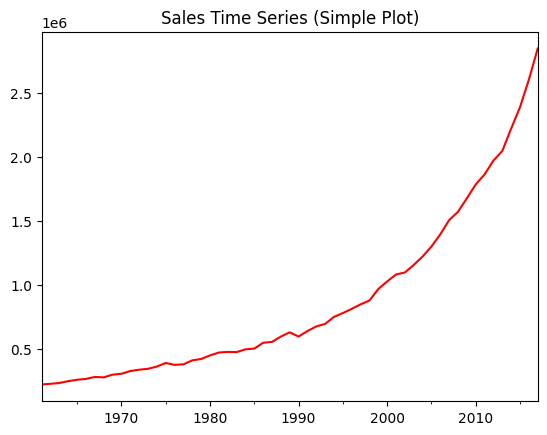

In [ ]:
salesseries.plot(color='red', title ="Sales Time Series (Simple Plot)")

In [ ]:
salesseries2 = salesseries.loc['1990-12-31':'2016-12-31']

<Axes: title={'center': 'Sales Time Series (Subset)'}>

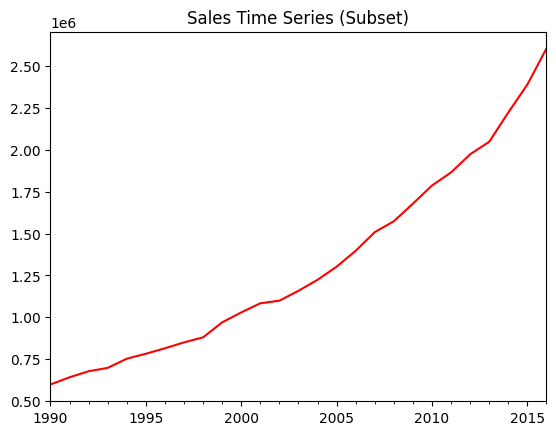

In [ ]:
salesseries2.plot(color='red', title ="Sales Time Series (Subset)")

In [ ]:
## Time Series Decomposition
import pandas as pd
salesdata = pd.read_csv("/content/Sales Data for 3 Years.csv")
rng = pd.date_range('01-01-2013','31-12-2015',freq='M')
s = salesdata.Sales.values
salesseries = pd.Series(s, rng)

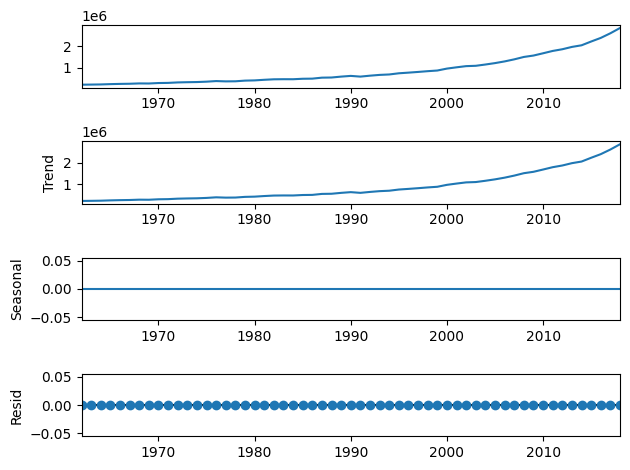

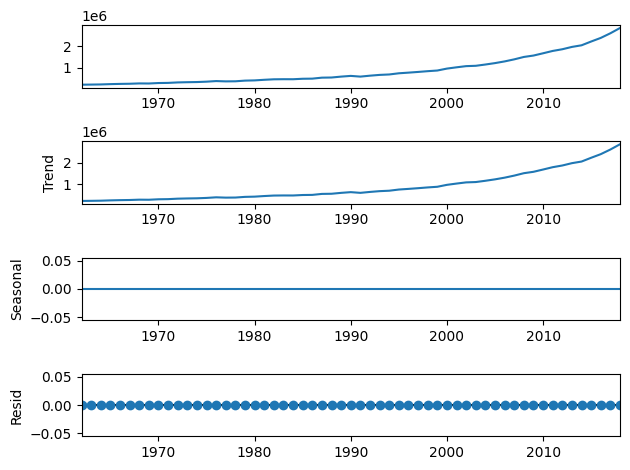

In [ ]:
import statsmodels.api as sm
decomp = sm.tsa.seasonal_decompose(salesseries.interpolate())
decomp.plot()

In [ ]:
decomp.seasonal

1961-12-31    0.0
1962-12-31    0.0
1963-12-31    0.0
1964-12-31    0.0
1965-12-31    0.0
1966-12-31    0.0
1967-12-31    0.0
1968-12-31    0.0
1969-12-31    0.0
1970-12-31    0.0
1971-12-31    0.0
1972-12-31    0.0
1973-12-31    0.0
1974-12-31    0.0
1975-12-31    0.0
1976-12-31    0.0
1977-12-31    0.0
1978-12-31    0.0
1979-12-31    0.0
1980-12-31    0.0
1981-12-31    0.0
1982-12-31    0.0
1983-12-31    0.0
1984-12-31    0.0
1985-12-31    0.0
1986-12-31    0.0
1987-12-31    0.0
1988-12-31    0.0
1989-12-31    0.0
1990-12-31    0.0
1991-12-31    0.0
1992-12-31    0.0
1993-12-31    0.0
1994-12-31    0.0
1995-12-31    0.0
1996-12-31    0.0
1997-12-31    0.0
1998-12-31    0.0
1999-12-31    0.0
2000-12-31    0.0
2001-12-31    0.0
2002-12-31    0.0
2003-12-31    0.0
2004-12-31    0.0
2005-12-31    0.0
2006-12-31    0.0
2007-12-31    0.0
2008-12-31    0.0
2009-12-31    0.0
2010-12-31    0.0
2011-12-31    0.0
2012-12-31    0.0
2013-12-31    0.0
2014-12-31    0.0
2015-12-31    0.0
2016-12-31

In [ ]:
decomp.trend

1961-12-31     224786.0
1962-12-31     230034.0
1963-12-31     236562.0
1964-12-31     250960.0
1965-12-31     261615.0
1966-12-31     268316.0
1967-12-31     283589.0
1968-12-31     280160.0
1969-12-31     301422.0
1970-12-31     308018.0
1971-12-31     329825.0
1972-12-31     340060.0
1973-12-31     347253.0
1974-12-31     364834.0
1975-12-31     392503.0
1976-12-31     378157.0
1977-12-31     382006.0
1978-12-31     413094.0
1979-12-31     423874.0
1980-12-31     451496.0
1981-12-31     474131.0
1982-12-31     478918.0
1983-12-31     477392.0
1984-12-31     499120.0
1985-12-31     504914.0
1986-12-31     550379.0
1987-12-31     557258.0
1988-12-31     598885.0
1989-12-31     631839.0
1990-12-31     598974.0
1991-12-31     641921.0
1992-12-31     678033.0
1993-12-31     697861.0
1994-12-31     752669.0
1995-12-31     782484.0
1996-12-31     815049.0
1997-12-31     850217.0
1998-12-31     880267.0
1999-12-31     969702.0
2000-12-31    1029178.0
2001-12-31    1083572.0
2002-12-31    10

<Axes: >

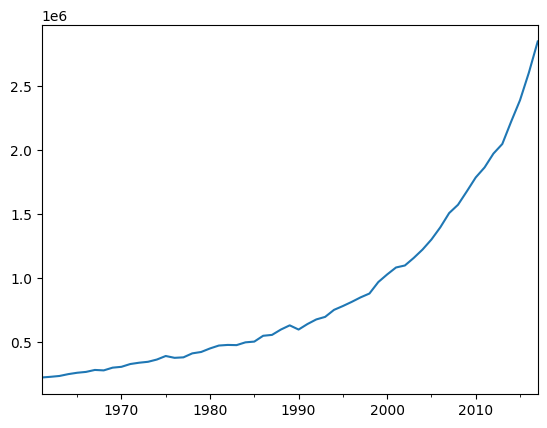

In [ ]:
## adjusting seasonality
salesadj = salesseries - decomp.seasonal
salesadj.plot()

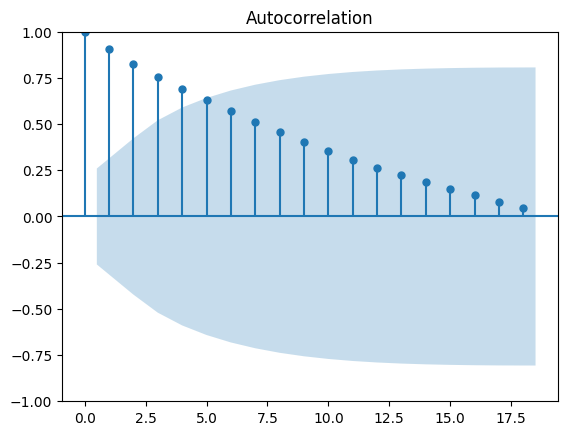

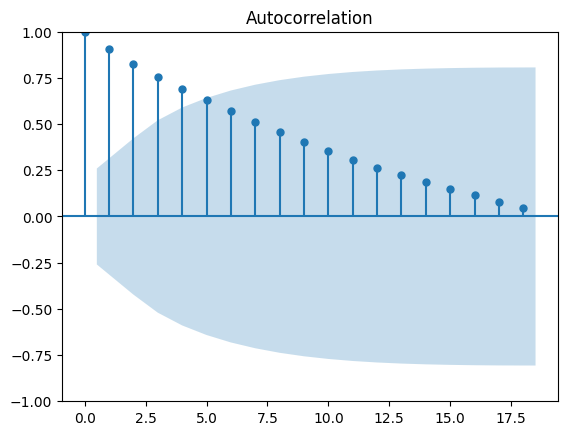

In [ ]:
## Checking Stationarity – Correlogram (ACF plot)
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(salesseries)

<Axes: >

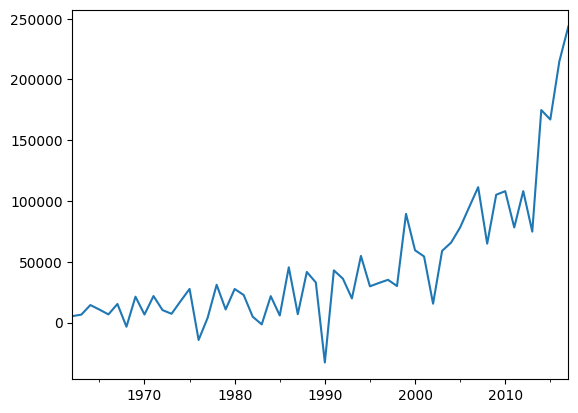

In [ ]:
## Plot of 1st Order Differenced Time Series
from statsmodels.tsa.statespace.tools import diff
salesdiff = diff(salesseries)
salesdiff.plot()

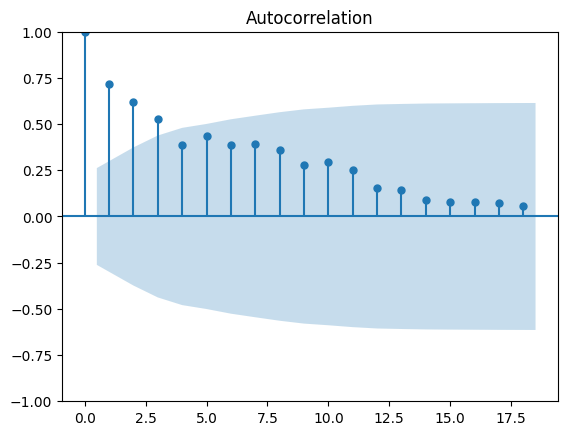

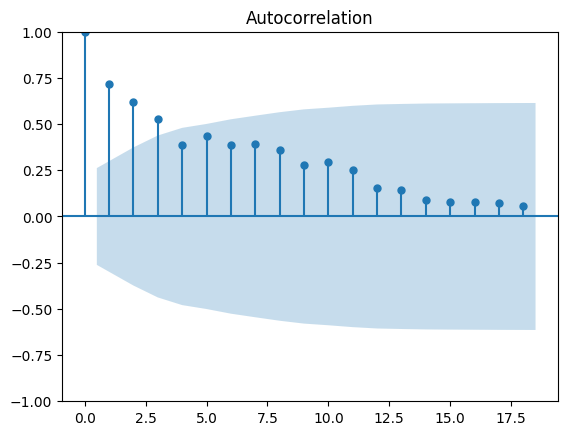

In [ ]:
## Correlogram for 1st Order Differenced Time Series
plot_acf(salesdiff)

<Axes: >

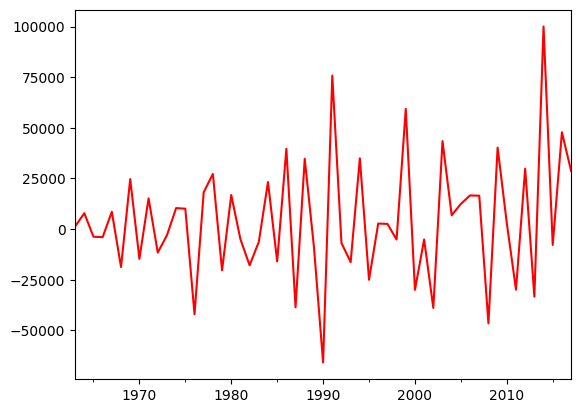

In [ ]:
## Plot of 2nd Order Differenced Time Series
salesdiff2 = diff(salesdiff)
salesdiff2.plot(color='red')

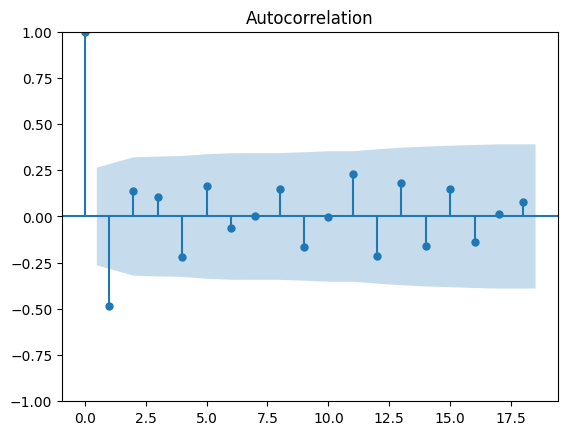

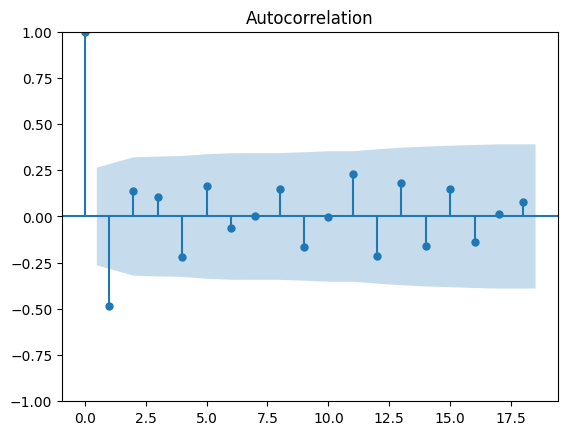

In [ ]:
## Correlogram for 2nd Order Differenced Time Series
plot_acf(salesdiff2)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


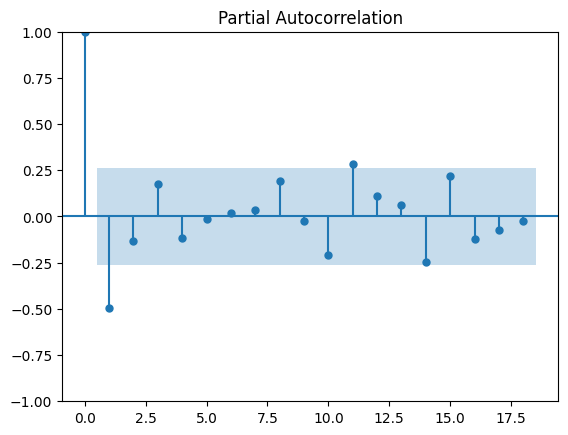

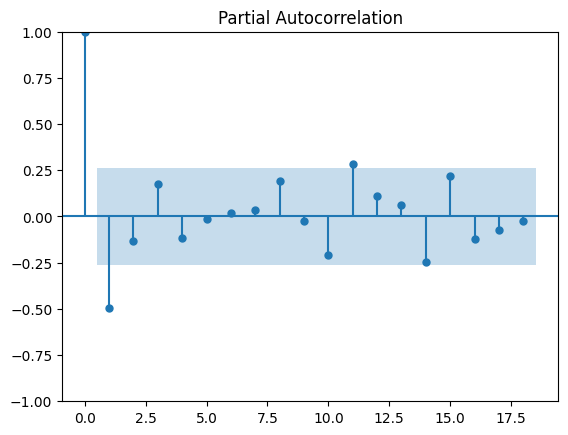

In [ ]:
## Partial Autocorrelations for 2nd Order Differenced Time Series
plot_pacf(salesdiff2)

In [ ]:
## Dickey Fuller Test
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 13.4 MB/s eta 0:00:00


In [ ]:
from arch.unitroot import ADF 

adf = ADF(salesseries,lags=0,trend='n')
adf.summary()

Test Statistic,19.275
P-value,1.000
Lags,0


In [ ]:
adf = ADF(salesdiff2,lags=0,trend='n')
adf.summary()

Test Statistic,-11.908
P-value,0.000
Lags,0


In [ ]:
## ARIMA model 
# Step 1: Stationarity Checking (same as above)
# Step 2: Model Identification


In [ ]:
# Step 3: Parameter Estimation
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(salesseries, order=(2, 2, 2)).fit()
model.params
model.aic

1293.8912617376225

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.2 MB/s eta 0:00:00


In [ ]:
# Automatic Estimation of Model Parameters

model = auto_arima(salesseries,max_p=2, max_q=2, d=2,           
                      seasonal=False, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=1294.586, Time=0.52 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1295.387, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1291.568, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1292.152, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1294.532, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=1291.358, Time=0.22 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=1292.717, Time=0.24 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1293.092, Time=0.19 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1290.274, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1290.280, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1292.003, Time=0.75 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1290.670, Time=0.32 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 3.096 seconds


In [ ]:
## ARIMA Model Using BEST Order
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(salesseries, order=(2, 2, 0)).fit()

model.params
model.aic

1290.274116014659

<Axes: >

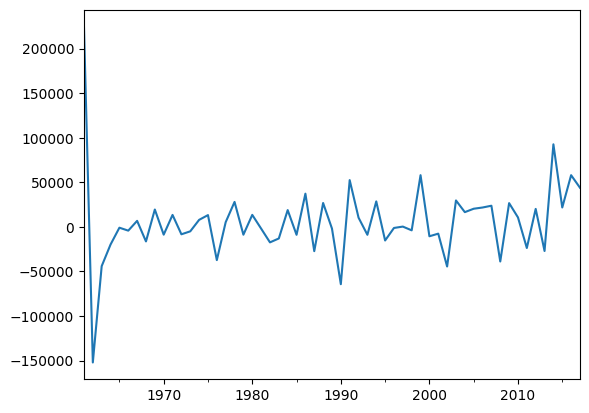

In [ ]:
# Step 4: Diagnostic Checking
resi = model.resid

resi.plot()
## Interpretation :Errors follow white noise process.


In [ ]:
# Step 5: Forecasting
model.forecast(steps=3)
# Interpretation :forecast() returns three arrays:
#array of three forecasts
#array of these standard error of the forecasts 
#array of the confidence interval for the forecast


2018-12-31    3.075934e+06
2019-12-31    3.305379e+06
2020-12-31    3.536293e+06
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [ ]:
## Seasonal ARIMA Model (SARIMA)

